# Principal Component Analysis Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Step 1: Get the Data

For this exercise we will create a 3D toy data. This is arbitrary data so we can guess in advance how our results will look. To make things easier in the following sections we will convert the data into a toy dataframe.

In [2]:
x = np.random.randint(low = -10, high = 10, size=100)
y = np.random.normal(-2*x + 3, size=100)
z = np.random.normal(x**2, size=100)

df= pd.DataFrame({'X': x, 'Y': y, 'Z': z})
#round for simplicity
df = df.round()
df.head()

,X,Y,Z
0,-3,9.0,9.0
1,6,-8.0,36.0
2,-5,13.0,25.0
3,6,-11.0,37.0
4,9,-16.0,82.0


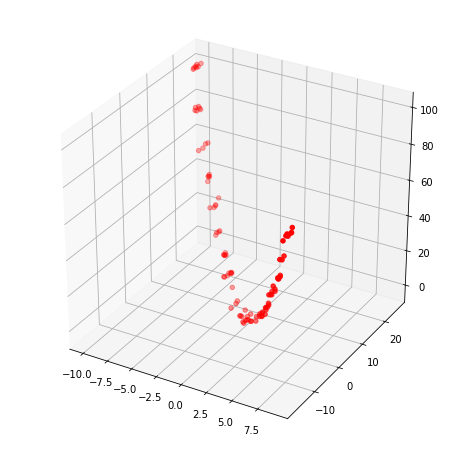

In [3]:
#plot our data

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'red')
plt.savefig('plots/toy_pca_3d.png')
plt.show()

## Step 2: Subtract the Mean

For PCA to work we need to have dataset with a mean of zero. We can subtract the average across each dimension easily with the code below

In [4]:
#confirm we are getting the means for the feature space
means = df.mean(axis=0)
means

X    -0.47
Y     3.86
Z    37.39
dtype: float64

In [5]:
df_mean = df - df.mean(axis=0)
df_mean.head()

,X,Y,Z
0,-2.53,5.14,-28.39
1,6.47,-11.86,-1.39
2,-4.53,9.14,-12.39
3,6.47,-14.86,-0.39
4,9.47,-19.86,44.61


## Step 3: Calculate the Covariance Matrix

The non diagonal terms are the covariance of one dimension with another, for example X and Y are negatively correlated.

In [6]:
df_cov = df_mean.cov()
df_cov.head()

,X,Y,Z
X,37.746566,-77.490707,-39.885556
Y,-77.490707,160.242828,83.166263
Z,-39.885556,83.166263,980.947374


## Step 4: Calculate Eigenvectors and Eigenvalues of Covariance Matrix

We compute the eigenvectors v and eigenvalues w with numpy's linear algebra package: [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html). The eigenvectors are normalized such that the column v[:, i] is the eigenvector corresponding to the eigenvalue w[i]. The computed eigenvalues are not necessarily ordered, this will be relevant in the next step.

In [7]:
eigenval, eigenvect = np.linalg.eig(df_cov)

In [8]:
print(eigenval)

[2.21375921e-01 1.87051923e+02 9.91663469e+02]


In [9]:
print(eigenvect)

[[-8.99948771e-01 -4.33121131e-01 -4.99829609e-02]
 [-4.35995495e-01  8.93917172e-01  1.04019313e-01]
 [ 3.72335542e-04 -1.15404399e-01  9.93318522e-01]]


## Step 5: Choosing Components and New Feature Vector

Now that we have eigenvectors and eigenvalues we can begin the dimensionality reduction. As it turns out, the eigenvector with the highest eigenvalue is the principle component of the dataset. In fact the eigenvector with the largest eigenvalue represents the most signficant relationship between the data dimensions.

In [10]:
#get the sorted indeces of eigenvalues
eigval_sort_idx = np.argsort(eigenval)
eigval_sort_idx

array([0, 1, 2])

In [11]:
feature_vector = eigenvect[:, eigval_sort_idx[1:]]
feature_vector

array([[-0.43312113, -0.04998296],
       [ 0.89391717,  0.10401931],
       [-0.1154044 ,  0.99331852]])

## Step 6: Deriving the New Dataset

In the last part we take the transpose of the vector and multiply it on the left of the original dataset, transposed.

In [12]:
#take note of feature vector shape
feature_vector.shape

(3, 2)

In [13]:
# evaluate shape of data
df_mean.shape

(100, 3)

The transposed feature vector is the row feature vector where the eigenvectors are now in the rows such that the most significant eigenvectors are at the top.

The row data adjust is the mean adjusted data transposed, where the each row holds a separate dimension.

In [14]:
row_feature_vector = feature_vector.T
row_data_adjust = df_mean.T

df_reduced = np.matmul(row_feature_vector, row_data_adjust)
df_reduced.shape

(2, 100)

In [15]:
final_data = pd.DataFrame(df_reduced.T, columns=['vect_1','vect_2'])
final_data.head()

,vect_1,vect_2
0,8.966862,-27.539197
1,-13.243739,-2.937772
2,11.562302,-11.130057
3,-16.040895,-2.256511
4,-27.003042,41.772777


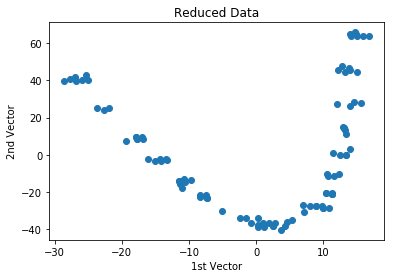

In [16]:
plt.scatter(final_data['vect_1'], final_data['vect_2'])
plt.xlabel("1st Vector")
plt.ylabel("2nd Vector")
plt.title("Reduced Data")
plt.savefig('plots/reduced_data.png')
plt.show()

## Step -1: Getting the Old Data Back

In [17]:
row_data_adjust = np.matmul(row_feature_vector.T, df_reduced)
row_data_adjust.shape

(3, 100)

In [18]:
row_data_adjust_df = pd.DataFrame(row_data_adjust.T, columns=['X', 'Y', 'Z'])
row_data_adjust_df.head()

,X,Y,Z
0,-2.507247,5.151023,-28.390009
1,5.882982,-12.144391,-1.389757
2,-4.451564,9.178000,-12.390032
3,7.060438,-14.573952,-0.390244
4,9.607661,-19.793308,44.609943


In [19]:
original_data = row_data_adjust_df + means
original_data =original_data.round()
original_data.head()

,X,Y,Z
0,-3.0,9.0,9.0
1,5.0,-8.0,36.0
2,-5.0,13.0,25.0
3,7.0,-11.0,37.0
4,9.0,-16.0,82.0
